**Cargar paqueterías**

In [1]:
using DataFrames

In [2]:
using CSV

In [3]:
using Plots

In [4]:
pyplot()

Plots.PyPlotBackend()

In [17]:
using DSP

**Cargar datos**

In [5]:
Datos1=readtable("2014-06-JQRO_minuto_L1-F.csv");
Datos2=readtable("2014-07-JQRO_minuto_L1-F.csv");
Datos3=readtable("2014-08-JQRO_minuto_L1-F.csv");
Datos4=readtable("2014-09-JQRO_minuto_L1-F.csv");
Datos5=readtable("2014-10-JQRO_minuto_L1-F.csv");
Datos6=readtable("2014-11-JQRO_minuto_L1-F.csv");
Datos7=readtable("2014-12-JQRO_minuto_L1-F.csv");

In [6]:
#Modifico la variable de tiempo junio
Tiempo1 = DateTime[]
for i=1:length(Datos1[:,1])

    push!(Tiempo1,DateTime(Datos1[i,1],"d/m/y HH:MM"))
    
end

In [7]:
#Modifico la variable de tiempo ju1io
Tiempo2 = DateTime[]
for i=1:length(Datos2[:,1])

    push!(Tiempo2,DateTime(Datos2[i,1],"d/m/y HH:MM"))
    
end

In [8]:
#Modifico la variable de tiempo agosto
Tiempo3 = DateTime[]
for i=1:length(Datos3[:,1])

    push!(Tiempo3,DateTime(Datos3[i,1],"d/m/y HH:MM"))
    
end

In [9]:
#Modifico la variable de tiempo septiembre
Tiempo4 = DateTime[]
for i=1:length(Datos4[:,1])

    push!(Tiempo4,DateTime(Datos4[i,1],"d/m/y HH:MM"))
    
end

In [10]:
#Modifico la variable de tiempo octubre
Tiempo5 = DateTime[]
for i=1:length(Datos5[:,1])

    push!(Tiempo5,DateTime(Datos5[i,1],"d/m/y HH:MM"))
    
end

In [11]:
#Modifico la variable de tiempo noviembre
Tiempo6 = DateTime[]
for i=1:length(Datos6[:,1])

    push!(Tiempo6,DateTime(Datos6[i,1],"d/m/y HH:MM"))
    
end

In [12]:
#Modifico la variable de tiempo diciembre
Tiempo7 = DateTime[]
for i=1:length(Datos7[:,1])

    push!(Tiempo7,DateTime(Datos7[i,1],"d/m/y HH:MM"))
    
end

In [13]:
 #Omito missing del tiempo
Tiempo1=collect(skipmissing(Tiempo1));
Tiempo2=collect(skipmissing(Tiempo2)); 
Tiempo3=collect(skipmissing(Tiempo3)); 
#Tiempo4=collect(skipmissing(Tiempo4); 
Tiempo5=collect(skipmissing(Tiempo5));
Tiempo6=collect(skipmissing(Tiempo6)); 
Tiempo7=collect(skipmissing(Tiempo7)); 

In [14]:
 #Omito missing de la temperatura
Temp1=collect(skipmissing(Datos1[:, 2])); Temp2=collect(skipmissing(Datos2[:, 2])); Temp3=collect(skipmissing(Datos3[:, 2])); Temp4=collect(skipmissing(Datos4[:, 2]));
Temp5=collect(skipmissing(Datos5[:, 2])); Temp6=collect(skipmissing(Datos6[:, 2])); Temp7=collect(skipmissing(Datos7[:, 2]));

 #Omito missing de la velocidad del viento
VelViento1=collect(skipmissing(Datos1[:, 4])); VelViento2=collect(skipmissing(Datos2[:, 4])); VelViento3=collect(skipmissing(Datos3[:, 4])); VelViento4=collect(skipmissing(Datos4[:, 4])); VelViento5=collect(skipmissing(Datos5[:, 4])); VelViento6=collect(skipmissing(Datos6[:, 4])); VelViento7=collect(skipmissing(Datos7[:, 4])); 

 #Omito missing de la dirección del tiempo
DirViento1=collect(skipmissing(Datos1[:, 6])); DirViento2=collect(skipmissing(Datos2[:, 6])); DirViento3=collect(skipmissing(Datos3[:, 6])); DirViento4=collect(skipmissing(Datos4[:, 6])); DirViento5=collect(skipmissing(Datos5[:, 6])); DirViento6=collect(skipmissing(Datos6[:, 6])); DirViento7=collect(skipmissing(Datos7[:, 6])); 

**Análisis de Temperatura**

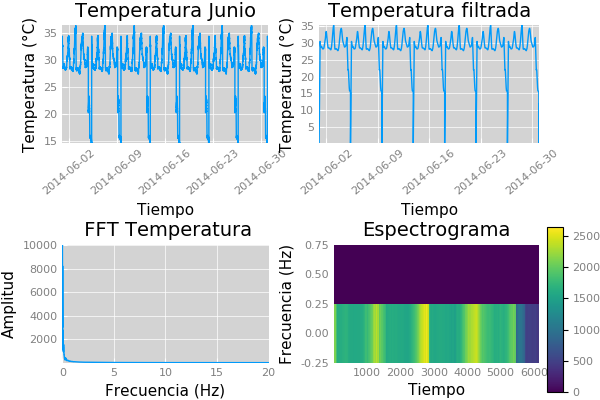

In [34]:
#Cargar tema
theme(:ggplot2::Symbol) 

#plot Tiempo vs Temp
T1= plot(Tiempo1, Temp1, ylab="Temperatura (°C)", xlabel="Tiempo", title="Temperatura Junio", xrotation=40, leg=false) 

#Filtro media móvil
VT1=ones(200)*(1/200) #Ventana de tiempo
CVT1=filt(VT1,1,Temp1); #Convolución de datos y ventana de tiempo

#Plot con datos filtrados
TF1=plot(Tiempo1,CVT1, ylab="Temperatura (°C)",xlabel="Tiempo", title="Temperatura filtrada", xrotation=40, label=false, leg=false)

#Aplicando Fourier a los datos filtrados
ftt1 = abs.(fft(CVT1,1));
F1=(floor(length(ftt1)/1 +1)/2) #Hacer el número par
fttp1 = ftt1[2:convert(Int64,F1)] 
fvec1t = collect(linspace(0,20,length(fttp1)))
PF1 = plot(fvec1t,fttp1, ylab="Amplitud", xlabel="Frecuencia (Hz)", title = " FFT Temperatura", label=false, leg=false)


#Espectograma
spe1=spectrogram(Temp1,2,1,fs=1)
fig1=heatmap(spe1.time,spe1.freq,spe1.power, color=:viridis, title="Espectrograma", xlabel="Tiempo", ylabel="Frecuencia (Hz)")

F1406=plot(T1, TF1, PF1, fig1)

